In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [33]:
# Load CSV data into a DataFrame
csv_filename = 'data_pull2_0802.csv'
df = pd.read_csv(csv_filename)

# Preprocess the text data (e.g., lowercase, tokenization)

# Split the data into features (X) and target (y)
X = df['Description']
y = df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Random Forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Predict stock symbols for the test set
y_pred = model.predict(X_test_tfidf)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.11642027750325837


Mean Squared Error: 0.20843205852725535


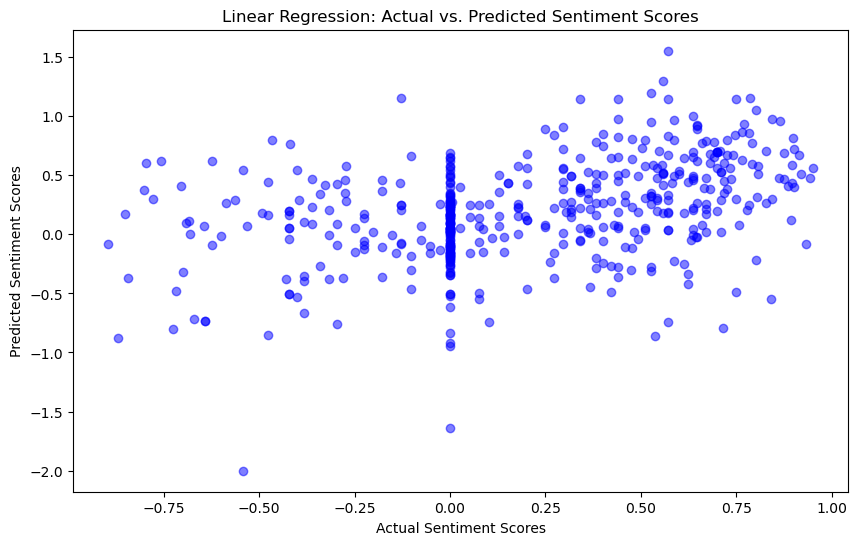

In [34]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_tfidf, y_train)

# Predict sentiment for the test set
y_pred = model.predict(X_test_tfidf)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the model predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Sentiment Scores')
plt.ylabel('Predicted Sentiment Scores')
plt.title('Linear Regression: Actual vs. Predicted Sentiment Scores')
plt.show()

Mean Squared Error: 0.15269177291109443


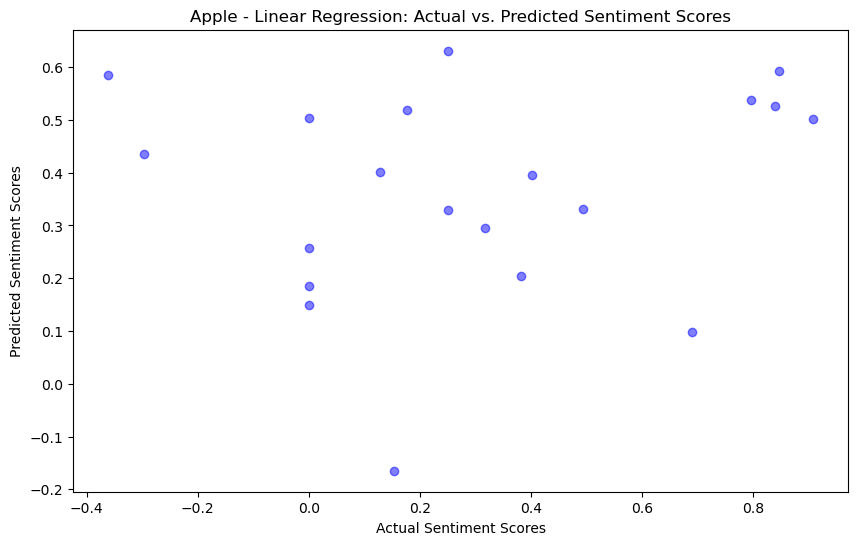

In [38]:
# Load CSV data into a DataFrame
csv_filename = 'data_pull_0802.csv'
df = pd.read_csv(csv_filename)

# Filter articles containing the stock name "Apple"
apple_df = df[df['Stock Name'].str.contains('apple', case=False)]

# Preprocess the text data (e.g., lowercase, tokenization)

# Split the data into features (X) and target (y)
X = apple_df['Description']
y = apple_df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Linear Regression model
model1 = LinearRegression()
model1.fit(X_train_tfidf, y_train)

# Predict sentiment for the test set
y_pred = model1.predict(X_test_tfidf)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the model predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Sentiment Scores')
plt.ylabel('Predicted Sentiment Scores')
plt.title('Apple - Linear Regression: Actual vs. Predicted Sentiment Scores')
plt.show()